<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 3)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Import the required libraries

In [1]:
# type your code here

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
from sklearn.model_selection import train_test_split

#### Read the data

Load the csv file and print the first five observations.

In [3]:
# type your code here

data=pd.read_csv('Fish.csv')

In [4]:
data.head()

,Species,Weight,V_length,D_length,C_length,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


Our objective is to predict the weight of a fish.

**The data definition is as follows:** <br>

**Species:** Species of a fish

**Weight:** Weight of a fish (target/dependent variable)

**V_length:** Vertical length of a fish

**D_length:** Diagonal length of a fish

**C_length:** Cross length of a fish

**Height:** Height of a fish

**Width:** Diagonal width of a fish

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   V_length  159 non-null    float64
 3   D_length  159 non-null    float64
 4   C_length  159 non-null    float64
 5   Height    159 non-null    float64
 6   Width     159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [6]:
data['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [7]:
data=pd.get_dummies(data=data,columns=['Species'],drop_first=True)

In [8]:
data

,Weight,V_length,D_length,C_length,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936,0,0,0,0,1,0
155,13.4,11.7,12.4,13.5,2.4300,1.2690,0,0,0,0,1,0
156,12.2,12.1,13.0,13.8,2.2770,1.2558,0,0,0,0,1,0
157,19.7,13.2,14.3,15.2,2.8728,2.0672,0,0,0,0,1,0


In [9]:
data.isna().sum()
#no null values

Weight               0
V_length             0
D_length             0
C_length             0
Height               0
Width                0
Species_Parkki       0
Species_Perch        0
Species_Pike         0
Species_Roach        0
Species_Smelt        0
Species_Whitefish    0
dtype: int64

### Let's begin with some hands-on practice exercises

In [10]:
data.columns

Index(['Weight', 'V_length', 'D_length', 'C_length', 'Height', 'Width',
       'Species_Parkki', 'Species_Perch', 'Species_Pike', 'Species_Roach',
       'Species_Smelt', 'Species_Whitefish'],
      dtype='object')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Build a full model on the scaled data and check whether the model is overfitting or not</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [11]:
# type your code here

ip=data.drop('Weight',axis=1)
op=data.Weight

In [12]:
inpc=sm.add_constant(ip)

In [13]:
#Base Model
ols=sm.OLS(op,inpc)
ols_mod=ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     194.7
Date:                Sat, 09 Jan 2021   Prob (F-statistic):           9.67e-82
Time:                        22:24:17   Log-Likelihood:                -941.46
No. Observations:                 159   AIC:                             1907.
Df Residuals:                     147   BIC:                             1944.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -907.1500    127.078     -7.139      0.000   -1158.285    -656.015
V_length            -79.3905     36.277     -2.188      0.030    -151.082      -7.699
D_length             83.5100     45.716      1.827      0.070      -6.835     173.856
C_length             28.0340     29.299      0.957      0.340     -29.867      85.935
Height                6.3568     13.055      0.487      0.627     -19.444      32.157
Width                -1.0454     23.912     -0.044      0.965     -48.301      46.210
Species_Parkki      157.1605     75.696      2.076      0.040       7.567     306.754
Species_Perch       129.2065    120.308      1.074      0.285    -108.551     366.964
Species_Pike       -209.6167    135.300     -1.549      0.123    -477.002      57.769
Species_Roach       106.7884     91.304      1.170      0.244     -73.650     287.227
Species_Smelt       438.3931    119.425      3.671      0.000     202.381     674.405
Species_Whitefish    89.2880     96.654      0.924      0.357    -101.722     280.298
==============================================================================
Omnibus:                       42.986   Durbin-Watson:                   0.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.736
Skew:                           1.170   Prob(JB):                     1.63e-21
Kurtosis:                       5.996   Cond. No.                     2.03e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
xtrain,xtest,ytrain,ytest=train_test_split(ip,op,test_size=0.3,random_state=1)

In [16]:
lr1=LinearRegression()
lr1.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
ytrain_pred=lr1.predict(xtrain)
ytrain_pred

array([ 3.65439718e+02,  8.18893950e+02,  5.92966266e+02,  5.86100603e+02,
        1.81494460e+01,  1.13819516e+02,  5.46097229e+02,  3.51560071e+01,
        5.84427373e+02,  2.51467851e+02,  1.90759506e+02,  4.43464495e+02,
        1.89830750e+02,  1.15312378e+03,  4.22301501e+01,  3.49536198e+00,
        1.03919423e+03, -5.47234046e+01, -6.43991613e+00, -5.77081533e+01,
        8.91210392e+02,  3.47193216e+02,  9.58183169e+02,  7.37302873e+02,
        4.75933491e+02,  2.83007714e+02,  8.93951011e+02,  1.52000429e+02,
        3.26769366e+02,  1.51147996e+02,  1.79289047e+02,  1.45369484e+02,
       -3.69894485e+01, -1.31612481e+02,  9.88675970e+02,  2.85169183e+02,
        3.92590749e+02,  2.32681079e+02,  5.10947330e+02,  8.83305379e+02,
        8.51027913e+02,  3.04460449e+02,  6.11527777e+01,  1.44226034e+02,
        8.94984720e+02,  1.54810027e+02,  7.34573530e+02,  7.05627958e+02,
        1.83378115e+02,  4.78589205e+02,  5.57796106e+02,  3.76441232e+02,
        8.24504205e+02,  

In [18]:
lr2=LinearRegression()
lr2.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
ytest_pred=lr2.predict(xtest)
ytest_pred

array([ 766.93900762,  109.24860669,  540.30915139,  200.38611819,
         83.77406638,  594.03009269,  121.03443347,  485.77804732,
         67.59191171,  250.14107983,  181.70598493,  225.06229285,
       -177.28869484,  374.93367395,  715.94402367,  187.10059476,
        191.76996904,  534.46040736,  476.69719788,  312.29978096,
          4.94762006, -173.53927847,  253.69563765,  486.74601124,
        147.89525721,  825.98378208,  581.03081489,  -84.18909947,
       1315.32547121,  206.65384085, 1028.91815727,  375.25230437,
        674.02807414,  357.7993448 ,  509.24494258,  359.14032741,
        141.04616195,  274.83038465,  901.64464647,  350.40113616,
        374.95049462,  653.98692253,  386.15393947,   21.94198552,
        506.86128463,  750.53235142,  -95.29506484,  727.49253278])

In [20]:
from sklearn.metrics import r2_score,mean_absolute_error

In [21]:
r2_score(ytrain,ytrain_pred)

0.9427556492750397

In [22]:
r2_score(ytest,ytest_pred)

0.9077461180458654

Model is Optimal fit and not overfitting as there is no big deviation and only its 4% difference so Perfect model.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Is there multicollinearity present in the scaled data?
                     </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [23]:
# type your code here

#Scaling the data
from sklearn.preprocessing import StandardScaler


In [24]:
sc=StandardScaler()
inp_sc=sc.fit_transform(ip)
inp_sc=pd.DataFrame(inp_sc,columns=ip.columns)
inp_sc

,V_length,D_length,C_length,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,-0.305789,-0.282303,-0.106020,0.596579,-0.236529,-0.272625,-0.737353,-0.346003,-0.379322,-0.310728,-0.19803
1,-0.225507,-0.198054,-0.002337,0.821261,-0.066579,-0.272625,-0.737353,-0.346003,-0.379322,-0.310728,-0.19803
2,-0.235542,-0.179332,-0.010977,0.797341,0.165793,-0.272625,-0.737353,-0.346003,-0.379322,-0.310728,-0.19803
3,0.005302,0.054694,0.196390,0.879771,0.022621,-0.272625,-0.737353,-0.346003,-0.379322,-0.310728,-0.19803
4,0.025372,0.054694,0.239592,0.812835,0.426371,-0.272625,-0.737353,-0.346003,-0.379322,-0.310728,-0.19803
...,...,...,...,...,...,...,...,...,...,...,...
154,-1.479903,-1.517960,-1.540309,-1.610359,-1.799403,-0.272625,-0.737353,-0.346003,-0.379322,3.218252,-0.19803
155,-1.459833,-1.499238,-1.531669,-1.530878,-1.873547,-0.272625,-0.737353,-0.346003,-0.379322,3.218252,-0.19803
156,-1.419692,-1.443072,-1.505748,-1.566687,-1.881402,-0.272625,-0.737353,-0.346003,-0.379322,3.218252,-0.19803
157,-1.309305,-1.321378,-1.384784,-1.427243,-1.398568,-0.272625,-0.737353,-0.346003,-0.379322,3.218252,-0.19803


In [25]:
inp_sc=sm.add_constant(inp_sc)

In [26]:
ols=sm.OLS(op,inp_sc)
ols_mod=ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     194.7
Date:                Sat, 09 Jan 2021   Prob (F-statistic):           9.67e-82
Time:                        22:24:21   Log-Likelihood:                -941.46
No. Observations:                 159   AIC:                             1907.
Df Residuals:                     147   BIC:                             1944.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               399.2698      7.441     53.661      0.000     384.565     413.974
V_length           -791.1227    361.498     -2.188      0.030   -1505.527     -76.718
D_length            892.1024    488.365      1.827      0.070     -73.021    1857.225
C_length            324.4561    339.096      0.957      0.340    -345.676     994.589
Height               27.1607     55.782      0.487      0.627     -83.077     137.399
Width                -1.7568     40.184     -0.044      0.965     -81.170      77.656
Species_Parkki       39.8817     19.209      2.076      0.040       1.920      77.843
Species_Perch        61.7163     57.466      1.074      0.285     -51.850     175.283
Species_Pike        -64.7735     41.809     -1.549      0.123    -147.398      17.851
Species_Roach        35.4119     30.277      1.170      0.244     -24.423      95.247
Species_Smelt       124.2266     33.841      3.671      0.000      57.348     191.105
Species_Whitefish    17.0144     18.418      0.924      0.357     -19.384      53.413
==============================================================================
Omnibus:                       42.986   Durbin-Watson:                   0.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.736
Skew:                           1.170   Prob(JB):                     1.63e-21
Kurtosis:                       5.996   Cond. No.                         180.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [28]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(ip.values,i) for i in range(ip.shape[1])]
vif['Features']=ip.columns
vif

,VIF,Features
0,18095.288475,V_length
1,30522.367427,D_length
2,7960.777533,C_length
3,235.486610,Height
4,182.874185,Width
5,1.272513,Species_Parkki
6,8.913123,Species_Perch
7,15.338391,Species_Pike
8,2.747195,Species_Roach
9,1.840413,Species_Smelt


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Apply the ridge regression with 'alpha = 1.5' and compare the RMSE on the test dataset with the RMSE obtained from linear regression using OLS
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [29]:
# type your code here

ols=sm.OLS(op,inpc)
ols_mod=ols.fit()
ols_mod.summary()

ypred=ols_mod.predict(inpc)
ypred

0      282.192930
1      333.284308
2      354.064068
3      442.073953
4      437.685483
          ...    
154     24.561700
155     30.478037
156     56.279274
157    119.699495
158    159.130341
Length: 159, dtype: float64

In [30]:
mse=np.mean((op-ypred)**2)
rmse=np.sqrt(mse)
rmse

90.21305484788705

In [31]:
from sklearn.linear_model import Ridge

In [32]:
xtrain,xtest,ytrain,ytest=train_test_split(ip,op,test_size=0.3,random_state=1)

In [33]:
ridge=Ridge(alpha=1.5,normalize=True)
ridge.fit(xtrain,ytrain)
pred=ridge.predict(xtest)
pred

array([702.98342072, 182.97552023, 546.56854808, 264.47613567,
       190.63943718, 583.29014574, 209.83908782, 516.03458147,
       179.54607311, 298.32174765, 253.94546297, 265.97530613,
        59.95169069, 382.44440601, 637.78513526, 266.15580735,
       212.54187102, 441.51259337, 429.93120984, 336.56763574,
        -5.27491904,  27.29656991, 274.82625512, 489.06095383,
       242.05864085, 706.34374741, 564.80056886, -46.09328772,
       950.14109536, 268.56531781, 778.22780522, 373.7156092 ,
       642.2984732 , 512.26883823, 547.64838076, 408.13930576,
       224.85091874, 276.81822591, 760.51481147, 379.40413643,
       550.51315582, 575.36051106, 382.98473202,   4.19408131,
       501.05118765, 615.75640799, 128.06676434, 656.86723043])

In [34]:
rmse=np.sqrt(mean_absolute_error(ytest,pred))
rmse

10.677753026720744

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Build a full model using SGD. Plot a multiple barchart to compare the beta coefficients for each variable obtained by the SGD model and the full model build using OLS 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [35]:
# type your code here

from sklearn.linear_model import SGDRegressor

In [36]:
print(ols_mod.params)


const               -907.149966
V_length             -79.390480
D_length              83.510047
C_length              28.033970
Height                 6.356798
Width                 -1.045415
Species_Parkki       157.160463
Species_Perch        129.206549
Species_Pike        -209.616742
Species_Roach        106.788415
Species_Smelt        438.393056
Species_Whitefish     89.288024
dtype: float64


In [37]:
plotting=pd.DataFrame()

In [38]:
sgd=SGDRegressor()
sgd.fit(xtrain,ytrain)
sgd.coef_

array([-1.29789141e+10, -6.27443886e+09, -8.12407362e+09,  3.93275766e+09,
        1.45735693e+10,  2.24567074e+10, -8.45884211e+09, -1.26008671e+09,
        8.90479705e+09, -1.10227951e+10, -5.41482092e+09])

In [39]:
plotting['SGD_Coef']=sgd.coef_
plotting.index=xtrain.columns


In [40]:
ols_mod.summary()
ols_mod.params

const               -907.149966
V_length             -79.390480
D_length              83.510047
C_length              28.033970
Height                 6.356798
Width                 -1.045415
Species_Parkki       157.160463
Species_Perch        129.206549
Species_Pike        -209.616742
Species_Roach        106.788415
Species_Smelt        438.393056
Species_Whitefish     89.288024
dtype: float64

In [41]:
plotting['Ols_Coef']=ols_mod.params

In [42]:
plotting

,SGD_Coef,Ols_Coef
V_length,-1.297891e+10,-79.390480
D_length,-6.274439e+09,83.510047
C_length,-8.124074e+09,28.033970
Height,3.932758e+09,6.356798
Width,1.457357e+10,-1.045415
Species_Parkki,2.245671e+10,157.160463
Species_Perch,-8.458842e+09,129.206549
Species_Pike,-1.260087e+09,-209.616742
Species_Roach,8.904797e+09,106.788415
Species_Smelt,-1.102280e+10,438.393056


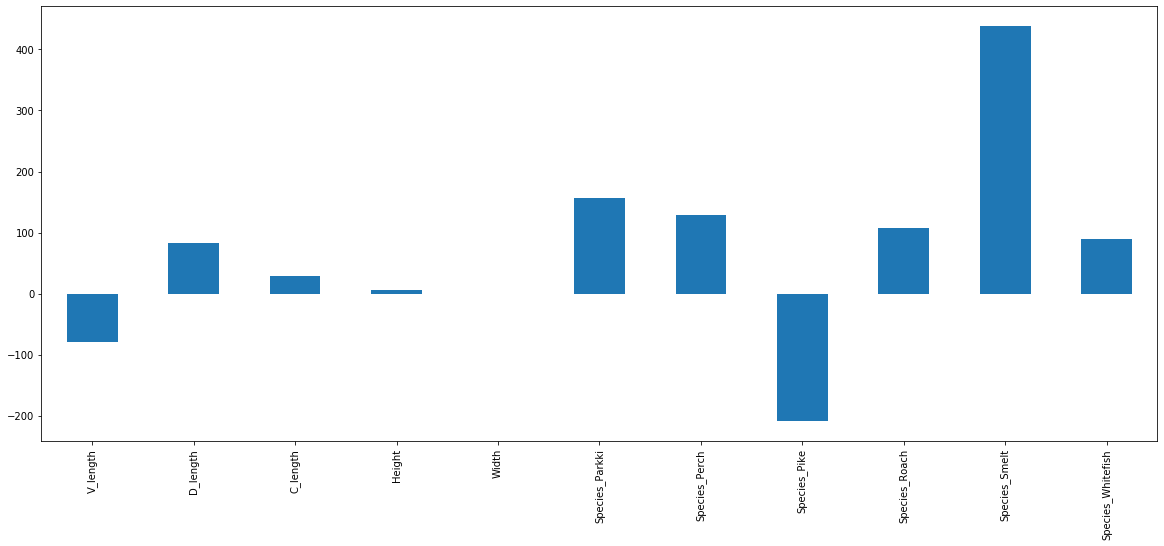

In [43]:
plotting['Ols_Coef'].plot(kind='bar',figsize=(20,8))

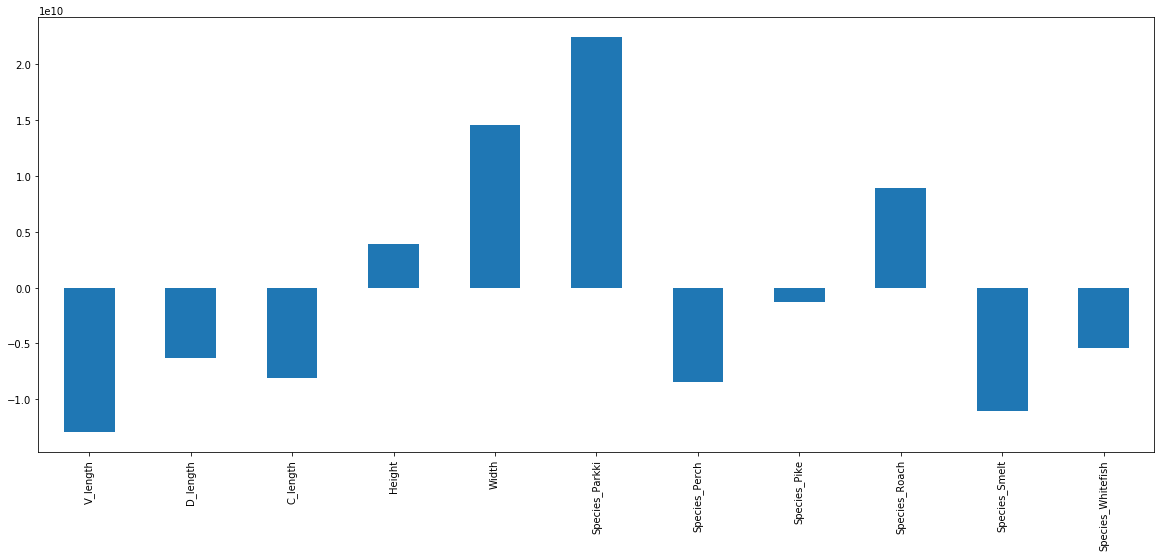

In [44]:
plotting['SGD_Coef'].plot(kind='bar',figsize=(20,8))

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Identify the least significant variables in the data by considering 'alpha = 0.1' 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [45]:
# type your code here
#use RFE if possible and check
coef=pd.DataFrame()
mod_ridge=Ridge(alpha=0.1,normalize=True)
mod_ridge.fit(ip,op)
coef['Alpha_0.1']=mod_ridge.coef_
coef.index=ip.columns
coef

# C_length 7.715355 is least significant amogst all the features

,Alpha_0.1
V_length,9.435969
D_length,8.933832
C_length,7.715355
Height,10.278211
Width,43.408508
Species_Parkki,30.557529
Species_Perch,18.843863
Species_Pike,-109.758533
Species_Roach,-8.901665
Species_Smelt,239.937929


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. What is the impact of diagonal width on the weight of a fish?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [46]:
data.columns

Index(['Weight', 'V_length', 'D_length', 'C_length', 'Height', 'Width',
       'Species_Parkki', 'Species_Perch', 'Species_Pike', 'Species_Roach',
       'Species_Smelt', 'Species_Whitefish'],
      dtype='object')

In [47]:
# type your code here
data[['Width','Weight']].corr()
#Highly correlated

,Width,Weight
Width,1.00000,0.88696
Weight,0.88696,1.00000


In [48]:
inp_6=data['Width']
op_6=data['Weight']
inp_6c=sm.add_constant(inp_6)
ols_mod6=sm.OLS(op_6,inp_6).fit()
ols_mod6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Weight   R-squared (uncentered):                   0.824
Model:                            OLS   Adj. R-squared (uncentered):              0.822
Method:                 Least Squares   F-statistic:                              737.5
Date:                Sat, 09 Jan 2021   Prob (F-statistic):                    2.11e-61
Time:                        22:24:26   Log-Likelihood:                         -1086.6
No. Observations:                 159   AIC:                                      2175.
Df Residuals:                     158   BIC:                                      2178.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Width        102.7112      3.782     27.157      0.000      95.241     110.181
==============================================================================
Omnibus:                       84.992   Durbin-Watson:                   0.312
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              341.319
Skew:                           2.085   Prob(JB):                     7.65e-75
Kurtosis:                       8.843   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Which value of alpha from the list of values returns lowest RMSE on the test set in ridge regression
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Consider the list of values for alpha:

    list_of_alpha = [0.00001, 0.001, 0.1, 10, 100]
    
Consider 5-fold cross validation.

In [49]:
# type your code here
from sklearn.model_selection import GridSearchCV,cross_val_score

In [53]:
rg=Ridge(normalize=True)
param={'alpha':[0.00001, 0.001, 0.1, 10, 100]}
grid=GridSearchCV(rg,param_grid=param,cv=5,scoring='neg_mean_squared_error')

In [55]:
mod_grid=grid.fit(xtrain,ytrain)
mod_grid.best_params_

{'alpha': 0.1}

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Select the best value for the elastic net mixing parameter from the list of values
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Consider the below list of values:

    list_of_parameter = [0.0001, 0.001, 0.01, 0.1, 1]

Consider 5-fold cross validation.

In [136]:
from sklearn.linear_model import ElasticNet,Lasso

In [137]:
# type your code here
en=ElasticNet(normalize=True)
param={'alpha':[0.00001, 0.001, 0.1, 10, 100]}
grid=GridSearchCV(en,param_grid=param,cv=5,scoring='r2')
mod_grid=grid.fit(xtrain,ytrain)
mod_grid.best_params_

E:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 336748.72379311494, tolerance: 1139.6263774431818
  positive)
E:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 383412.8700558137, tolerance: 1206.8389692359553
  positive)
E:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 388884.31448683166, tolerance: 1276.7368343820224
  positive)
E:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 378066.74419478036, tolerance: 1186.6064899

{'alpha': 0.001}

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Identify the best value of alpha from the list of values for lasso regression
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Consider the list of values for alpha:

    list_of_alpha = [0.0001, 0.001, 0.1, 1, 2, 3]
    
Consider 5-fold cross validation.

In [138]:
# type your code here
ls=Lasso(normalize=True)
param={'alpha':[0.00001, 0.001, 0.1, 10, 100]}
grid=GridSearchCV(ls,param_grid=param,cv=5,scoring='r2')
mod_grid=grid.fit(xtrain,ytrain)
mod_grid.best_params_

E:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 331753.7022860031, tolerance: 1139.6263774431818
  positive)
E:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 378685.28970646457, tolerance: 1206.8389692359553
  positive)
E:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 385995.6413232234, tolerance: 1276.7368343820224
  positive)
E:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 372520.6402643005, tolerance: 1186.606489977

{'alpha': 0.1}

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build the elastic net regression model with 'alpha = 0.1' and best l1_ratio obtained by the GridSearchCV method. Also, compute the RMSE for test set
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [140]:
# type your code here

en=ElasticNet(alpha=0.1,normalize=True)
param={'l1_ratio':[0.1, 0.2, 0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
grid=GridSearchCV(en,param_grid=param,cv=5,scoring='r2')
mod_grid=grid.fit(xtrain,ytrain)
mod_grid.best_params_

{'l1_ratio': 0.9}

In [148]:
xtrain,xtest,ytrain,ytest=train_test_split(ip,op,test_size=0.3,random_state=1)

In [151]:
mod_enet=ElasticNet(alpha=0.01,l1_ratio=0.9,normalize=True)
mod_enet.fit(xtrain,ytrain)
mod_enet.coef_

array([   9.23368252,    8.7130551 ,    7.44242386,    8.43818009,
         48.15474413,   45.64633143,   37.07651474, -107.30229516,
         -9.04085518,  231.45900021,   32.86509575])

In [157]:
pred=mod_enet.predict(xtest)
pred

array([ 789.19210765,  102.18955062,  564.83776084,  187.46078688,
         74.55441438,  626.60204348,  142.11428536,  520.14652527,
         93.24344317,  239.60304812,  170.15921189,  194.87233729,
       -130.1840115 ,  370.14997887,  734.2136295 ,  189.81748315,
        167.2986616 ,  500.45134657,  446.88720985,  300.06366141,
        -24.07323772, -139.79013425,  246.48219683,  479.05481573,
        150.0921336 ,  804.18895083,  595.69650945,  -89.27732434,
       1148.25672822,  193.64773874,  980.43388413,  358.04114841,
        754.57675473,  444.37546615,  588.32849746,  401.35071588,
        167.39165526,  260.03974067,  888.85069945,  340.17869899,
        497.40730642,  661.4429421 ,  369.94890785,   -9.07318295,
        503.01324802,  726.85608445,  -27.27644874,  729.64454794])

In [160]:
from sklearn.metrics import mean_squared_error

In [162]:
rmse = np.sqrt(mean_squared_error(ytest,pred))
rmse

104.23639579912306